## Predict whether income exceeds $50K/yr based on census data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder


import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=pd.errors.SettingWithCopyWarning)

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

In [4]:
adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets
print("Dataset Fetched")

Dataset Fetched


In [5]:
adult.data.headers

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
adult.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [7]:
census_df = adult.data.original
census_df.shape

(48842, 15)

In [8]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
census_df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11890,58,Self-emp-inc,229498,Some-college,10,Widowed,Sales,Not-in-family,White,Female,0,0,20,United-States,>50K
34312,29,Private,208406,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K.
18434,58,Private,116901,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,25,United-States,<=50K
44363,32,NaN,78374,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,1,United-States,<=50K.
25902,53,?,150393,HS-grad,9,Never-married,?,Not-in-family,White,Male,0,1504,35,United-States,<=50K


In [10]:
census_df = census_df.drop_duplicates()
census_df.shape

(48813, 15)

In [11]:
## Finding the missing values in the data

census_df.isnull().sum()


age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [12]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       47850 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education-num   48813 non-null  int64 
 5   marital-status  48813 non-null  object
 6   occupation      47847 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital-gain    48813 non-null  int64 
 11  capital-loss    48813 non-null  int64 
 12  hours-per-week  48813 non-null  int64 
 13  native-country  48539 non-null  object
 14  income          48813 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [13]:
# Displaying missing values count for each column
missing_values_count = {}
for column in census_df.columns:
    missing_values_count[column] = census_df[column].eq('?').sum()

for column, count in missing_values_count.items():
    print(column, "- Missing values:", count)



age - Missing values: 0
workclass - Missing values: 1836
fnlwgt - Missing values: 0
education - Missing values: 0
education-num - Missing values: 0
marital-status - Missing values: 0
occupation - Missing values: 1843
relationship - Missing values: 0
race - Missing values: 0
sex - Missing values: 0
capital-gain - Missing values: 0
capital-loss - Missing values: 0
hours-per-week - Missing values: 0
native-country - Missing values: 582
income - Missing values: 0


In [14]:
# Replacing '?' with Nulls
census_df.replace('?',pd.NA,inplace = True)
missingvalues=census_df.isnull().sum()
missingvalues

<ipython-input-14-f15b19fe0f03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_df.replace('?',pd.NA,inplace = True)


age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
income               0
dtype: int64

In [15]:
census_df['occupation'].value_counts()

Prof-specialty       6167
Craft-repair         6107
Exec-managerial      6084
Adm-clerical         5608
Sales                5504
Other-service        4919
Machine-op-inspct    3019
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1487
Tech-support         1445
Protective-serv       983
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [16]:
census_df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [17]:
# Deleting the whitespaces in all the string columns
for i in census_df.columns:
  if census_df[i].dtype == 'object':
    census_df[i] = census_df[i].str.strip()

<ipython-input-17-fc951e733abd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_df[i] = census_df[i].str.strip()


In [18]:
# Replacing 1-12th as 'Did not graduate'
entries = ['11th','9th','7th-8th','5th-6th','10th','1st-4th','12th']
census_df['education'] = census_df['education'].replace(entries,'Did not Graduate')
census_df['education'].unique()

<ipython-input-18-ca2a927f8712>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_df['education'] = census_df['education'].replace(entries,'Did not Graduate')


array(['Bachelors', 'HS-grad', 'Did not Graduate', 'Masters',
       'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Doctorate',
       'Prof-school', 'Preschool'], dtype=object)

In [19]:
# Removing string at the end of string in 'income' column
census_df['income'] = census_df['income'].str.rstrip('.')
census_df['income'].unique()

<ipython-input-19-794e9a8467c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_df['income'] = census_df['income'].str.rstrip('.')


array(['<=50K', '>50K'], dtype=object)

In [20]:
census_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48813.000000,4.881300e+04,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.647348,1.896679e+05,10.078688,1079.708705,87.554299,40.425051
std,13.709005,1.056062e+05,2.570257,7454.185982,403.118605,12.390954
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781400e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Capiital gain & Capital loss - most of their values are 0, which could indicate only a small category of people have capital gain/loss.

#### Hours/week - ranges from 1-99, with average of 40 hrs/week.
#### Education NUm - ranges from 1-16.
#### age - ranges from 17-90, with the average age in the data around 38 yrs.

In [21]:
# Separating Categorical and Numerical column

cat_col = census_df.select_dtypes(include=['object']).columns
num_col = census_df.select_dtypes(exclude=['object']).columns


Univariate Analysis

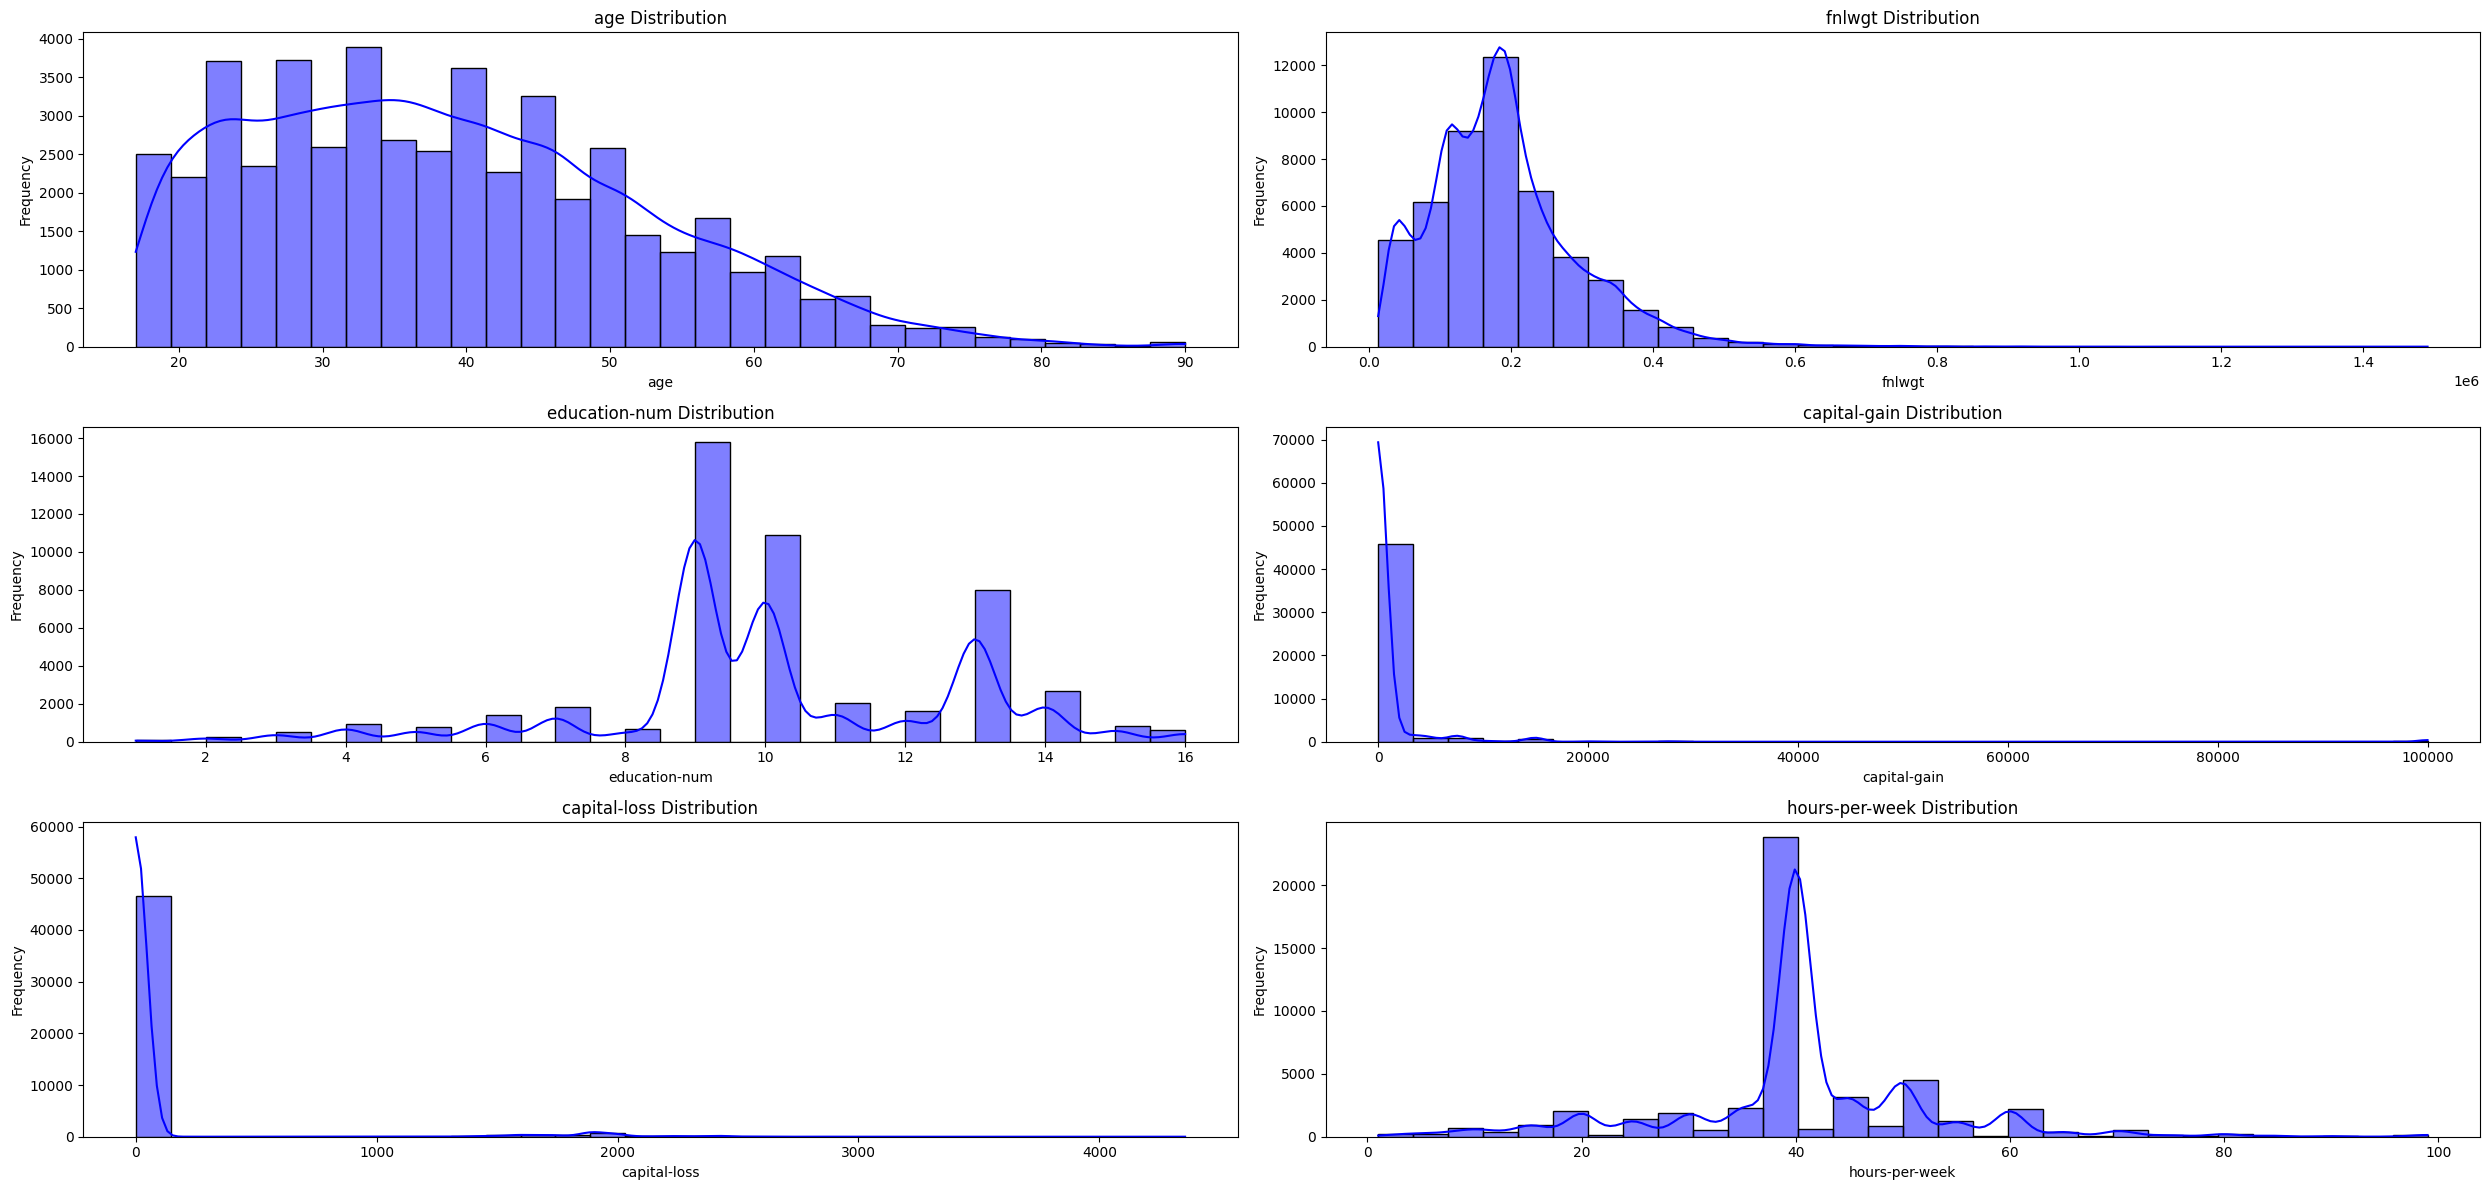

In [22]:
num_rows = ((len(num_col)+ 1) //2)
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(25,num_rows*4))
axes_flat = axes.flatten()

for i,column in enumerate(num_col):
  ax = axes.flat[i]
  #ax.hist(census_df[column], bins=30, color='pink', edgecolor='black')
  sns.histplot(census_df[column], bins=30, kde=True, color='blue', edgecolor='black', ax=ax)
  ax.set_title(f'{column} Distribution')
  ax.set_xlabel(column)
  ax.set_ylabel('Frequency')

if len(num_col) % 2 != 0:
    axes_flat[-1].set_visible(False)

plt.tight_layout()
plt.show()



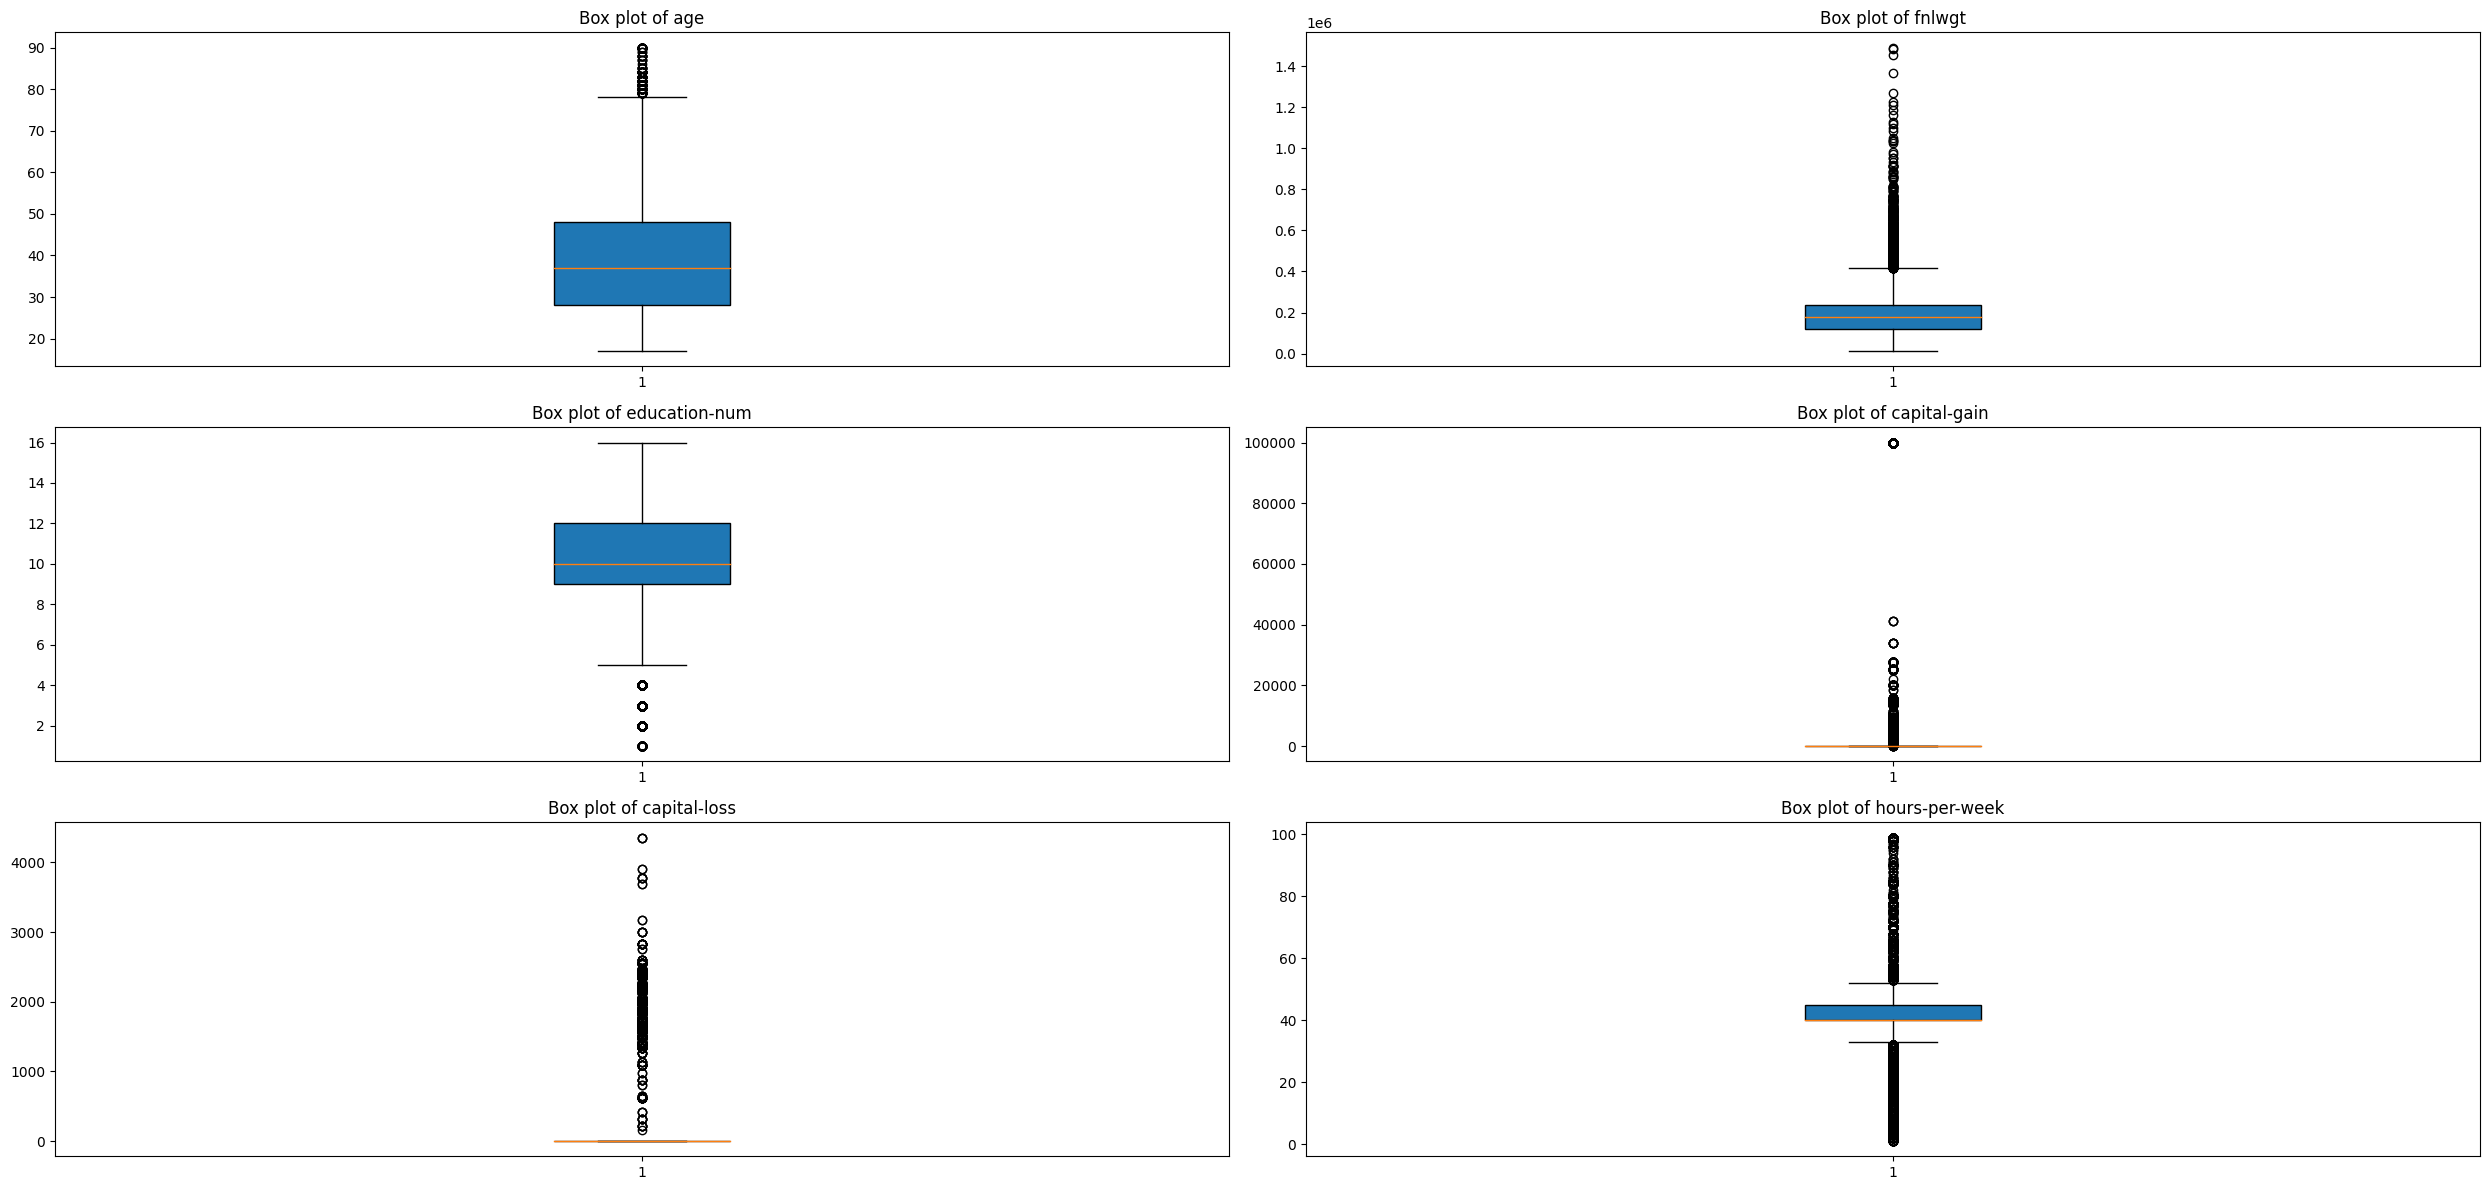

In [23]:
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(25,12))
for i,column in enumerate(num_col):
  ax = axes.flat[i]
  ax.boxplot(census_df[column],patch_artist=True)
  ax.set_title(f'Box plot of {column}' )

if len(num_col) % 2 != 0:
    axes_flat[-1].set_visible(False)
plt.tight_layout()
plt.show()



Age- Equally spread. There are few people significantly older than the main population.
Final Weight - Right-skewed.
Capital Gain - Most have 0 gain, with exception to certain data points which could be considered as extreme outliers.
CApital Loss - Most of the points are near 0, with certain outliers.
Hours/week -  Centered around 40 hrs/week, with outliers on both sides.

<ipython-input-24-2d48d8c5d3d4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=census_df[column],ax=ax,order=census_df[column].value_counts().index,palette = 'twilight',edgecolor='black')
<ipython-input-24-2d48d8c5d3d4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=census_df[column],ax=ax,order=census_df[column].value_counts().index,palette = 'twilight',edgecolor='black')
<ipython-input-24-2d48d8c5d3d4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=census_df[column],ax=ax,order=census_df[column].value_counts().index,pa

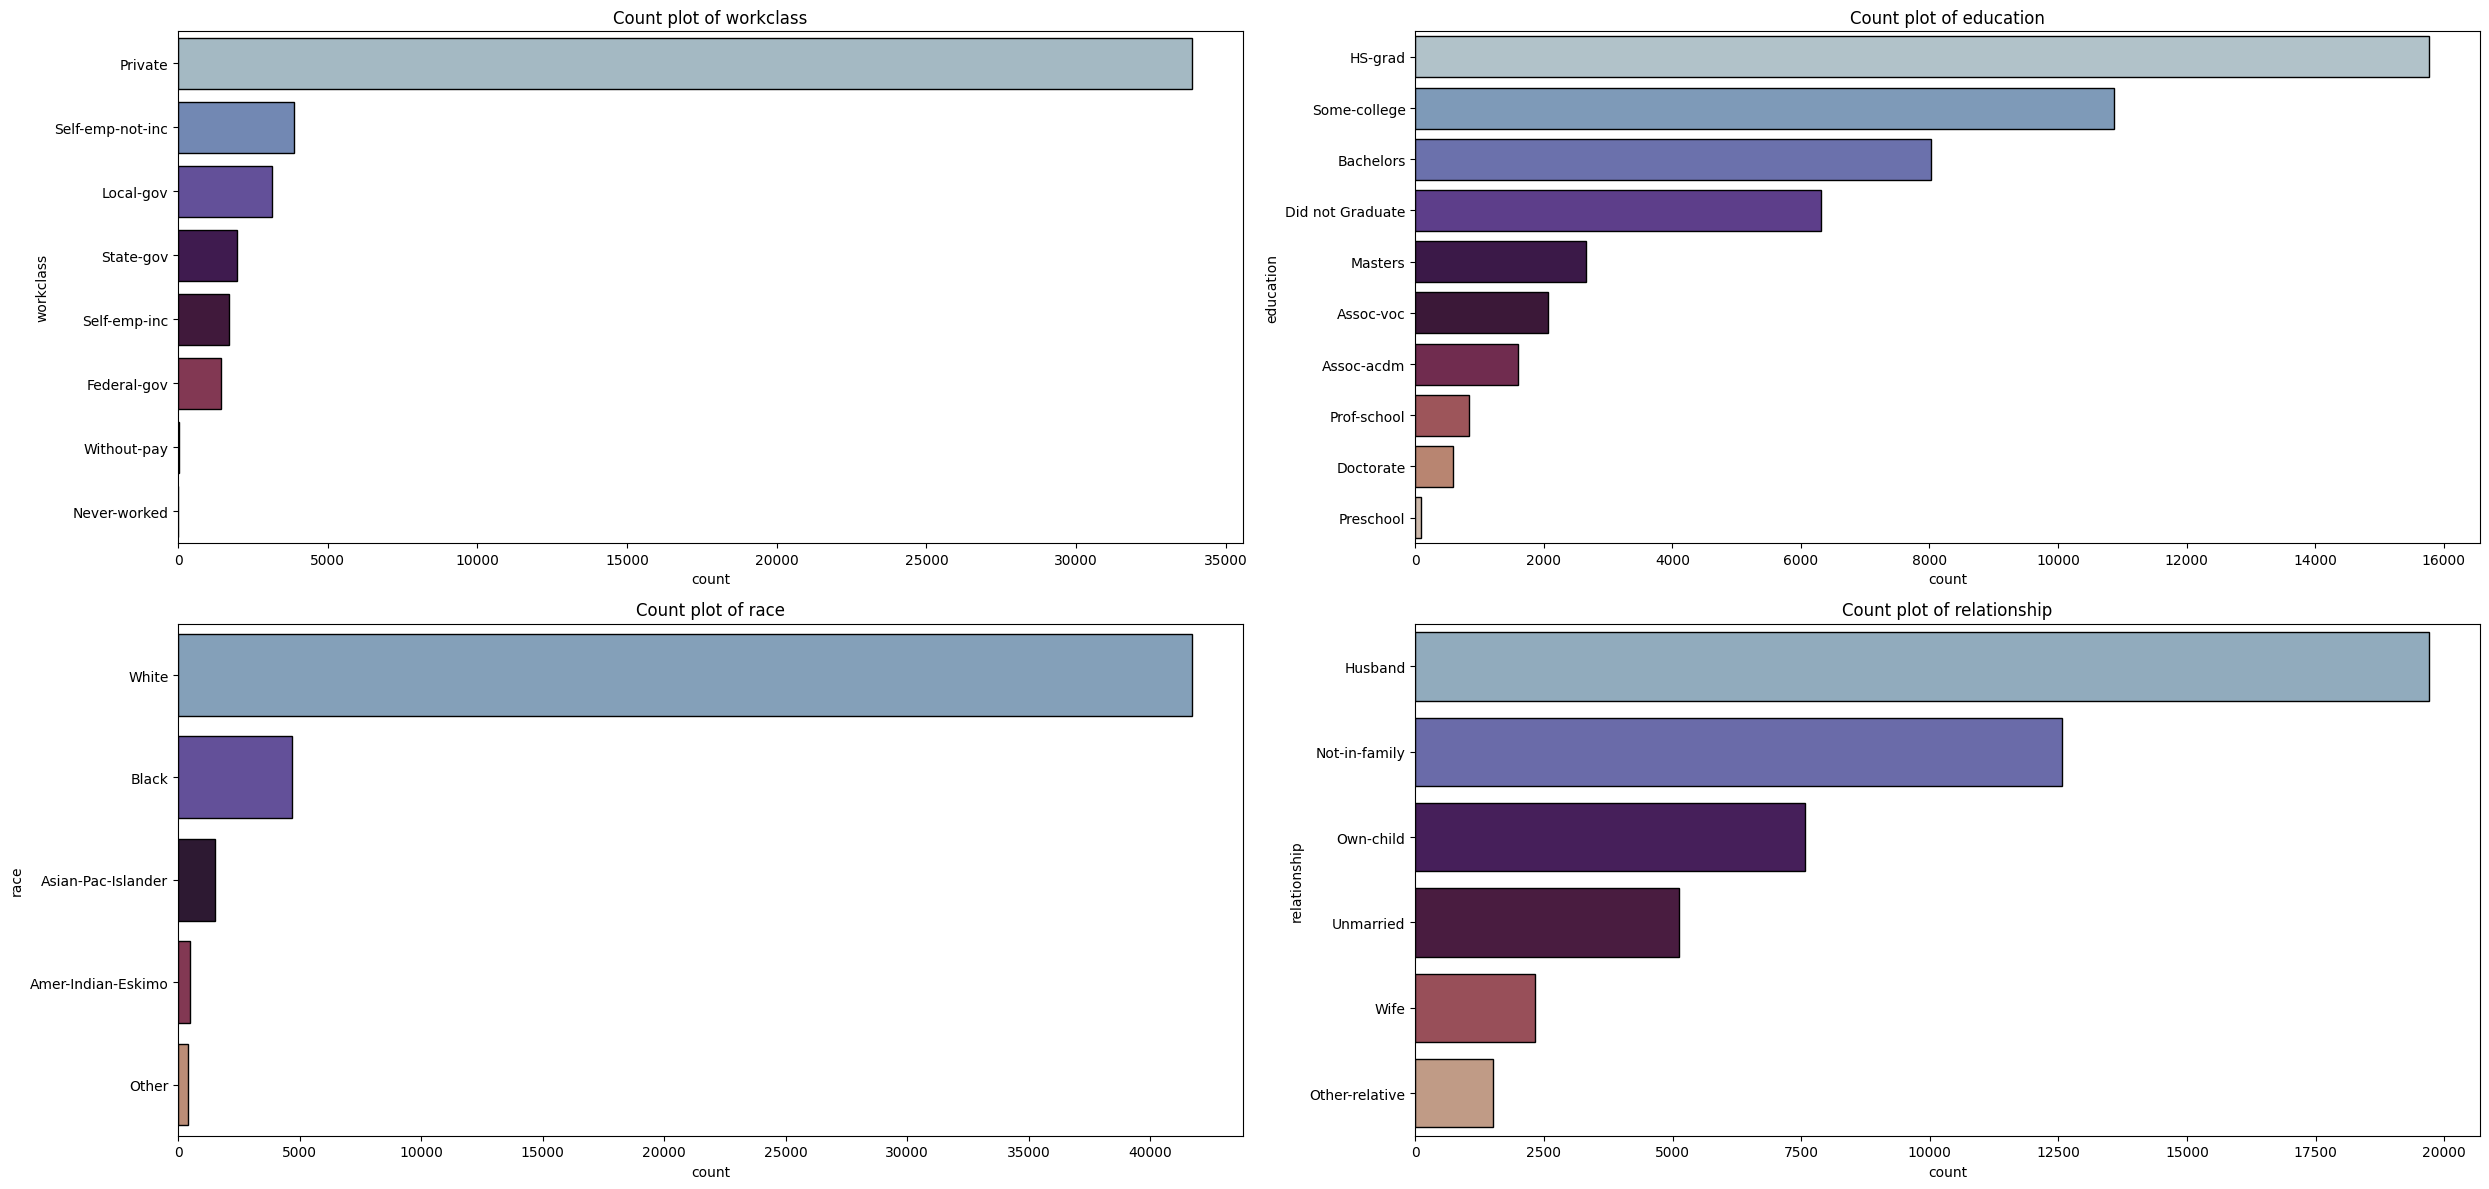

In [24]:
# Categorical variables
cat_cols1 = ['workclass','education','race','relationship']
cal_rows = ((len(cat_cols1)+ 1) //2)

axes_flat = axes.flatten()
fig, axes = plt.subplots(nrows=cal_rows, ncols=2, figsize=(25,cal_rows*6))
axes_flat = axes.flatten()
for i,column in enumerate(cat_cols1):
  ax = axes.flat[i]
  sns.countplot(y=census_df[column],ax=ax,order=census_df[column].value_counts().index,palette = 'twilight',edgecolor='black')
  ax.set_title(f'Count plot of {column}')

plt.tight_layout()
plt.show()

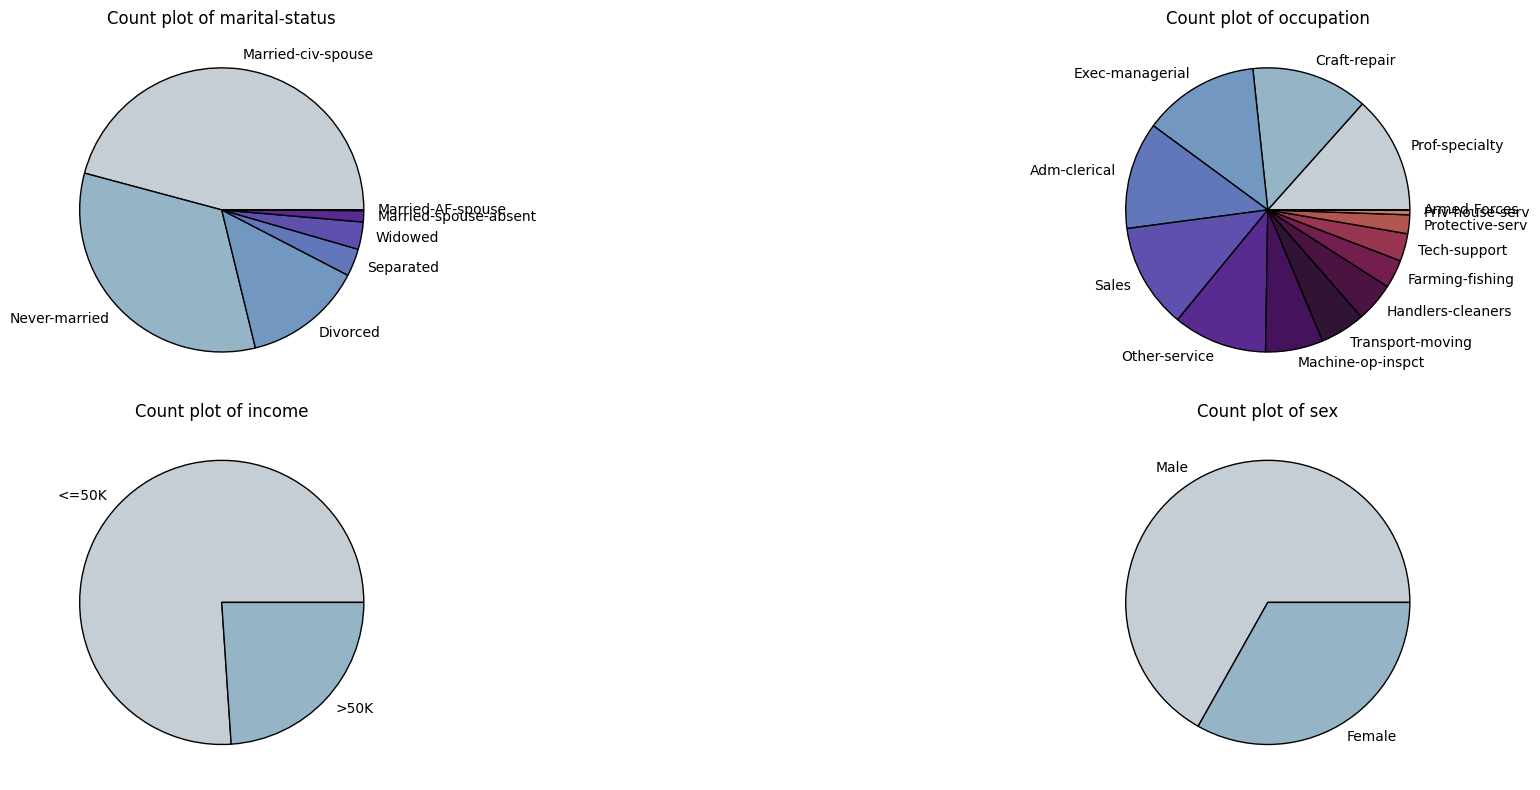

In [25]:
# Categorical variables
cat_cols2 = ['marital-status','occupation','income','sex']
cal_rows2 = ((len(cat_cols2)+ 1) //2)

axes_flat = axes.flatten()
fig, axes = plt.subplots(nrows=cal_rows2, ncols=2, figsize=(25,4*cal_rows2))

palette = sns.color_palette("twilight",n_colors=15)
colors = palette.as_hex()
axes_flat = axes.flatten()

for i,column in enumerate(cat_cols2):
  ax = axes.flat[i]
  data=census_df[column].value_counts()
  ax.pie(data,labels=data.index, colors=colors[:len(data)],wedgeprops={'edgecolor': 'black'})
  ax.set_title(f'Count plot of {column}')

plt.tight_layout()
plt.show()

Bivariate Analysis


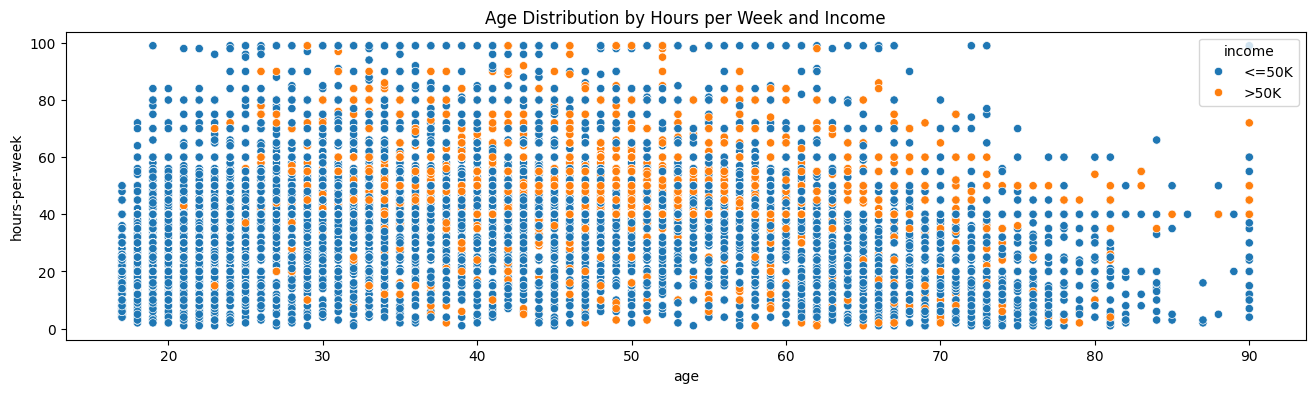

In [26]:
plt.figure(figsize=(16, 4))
sns.scatterplot(x='age', y='hours-per-week', hue='income', data=census_df)
plt.title('Age Distribution by Hours per Week and Income')
plt.show()

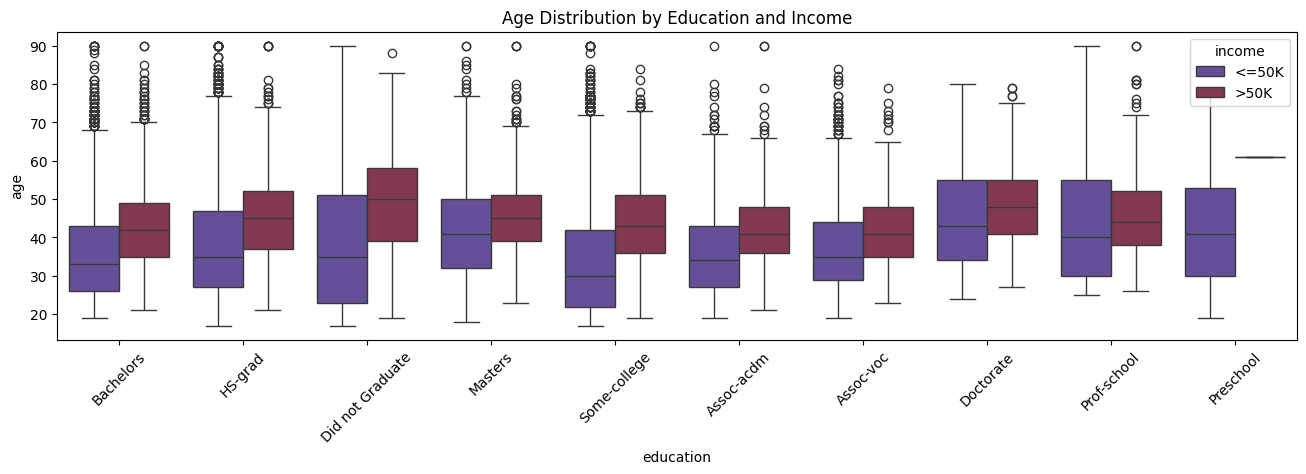

In [27]:
plt.figure(figsize=(16, 4))
sns.boxplot(x='education', y='age', hue='income', data=census_df,palette='twilight')
plt.xticks(rotation=45)
plt.title('Age Distribution by Education and Income')
plt.show()



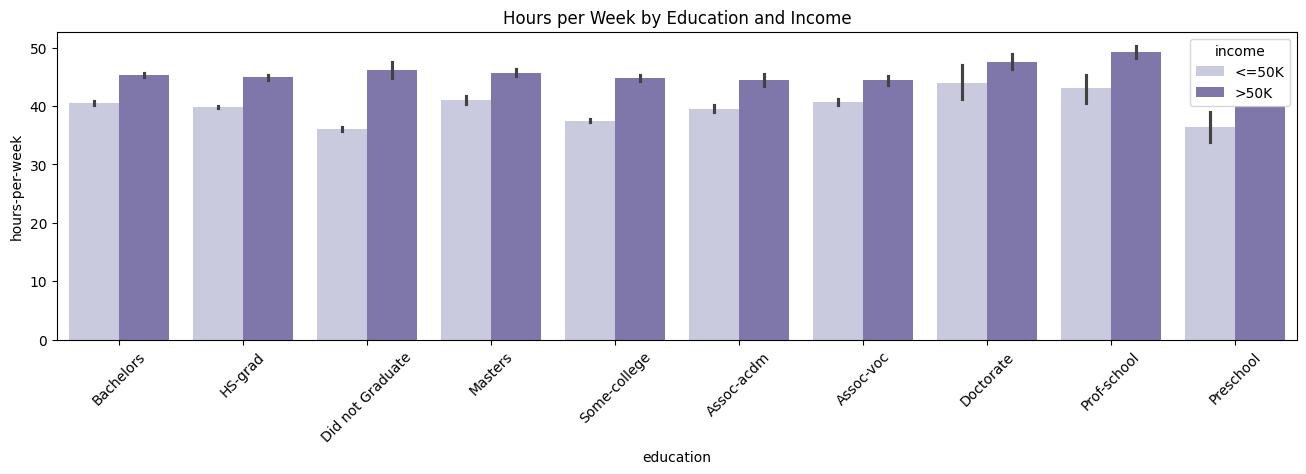

In [28]:
plt.figure(figsize=(16, 4))
sns.barplot(x='education', y='hours-per-week', hue='income', data=census_df,palette ='Purples')
plt.xticks(rotation=45)
plt.title('Hours per Week by Education and Income')
plt.show()

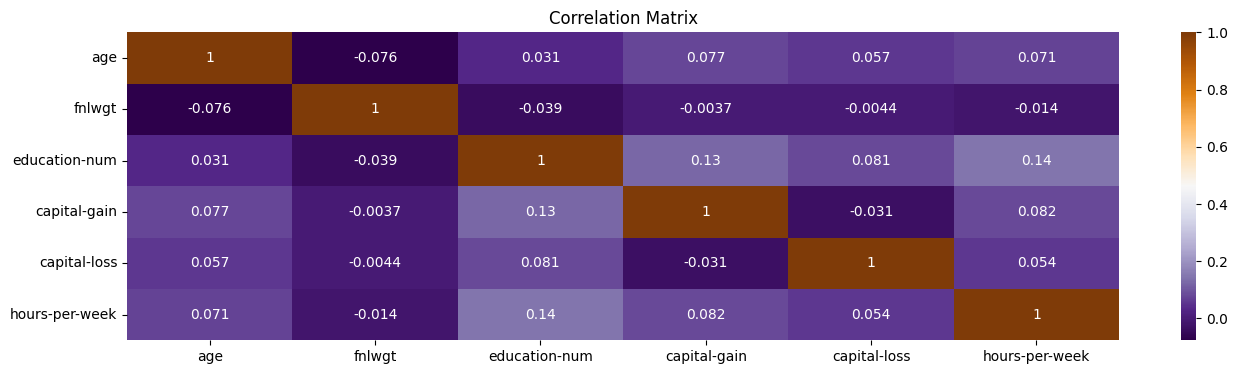

In [29]:
corr = census_df[num_col].corr()
plt.figure(figsize=(16, 4))
sns.heatmap(corr, annot=True, cmap='PuOr_r')
plt.title('Correlation Matrix' )
plt.show()

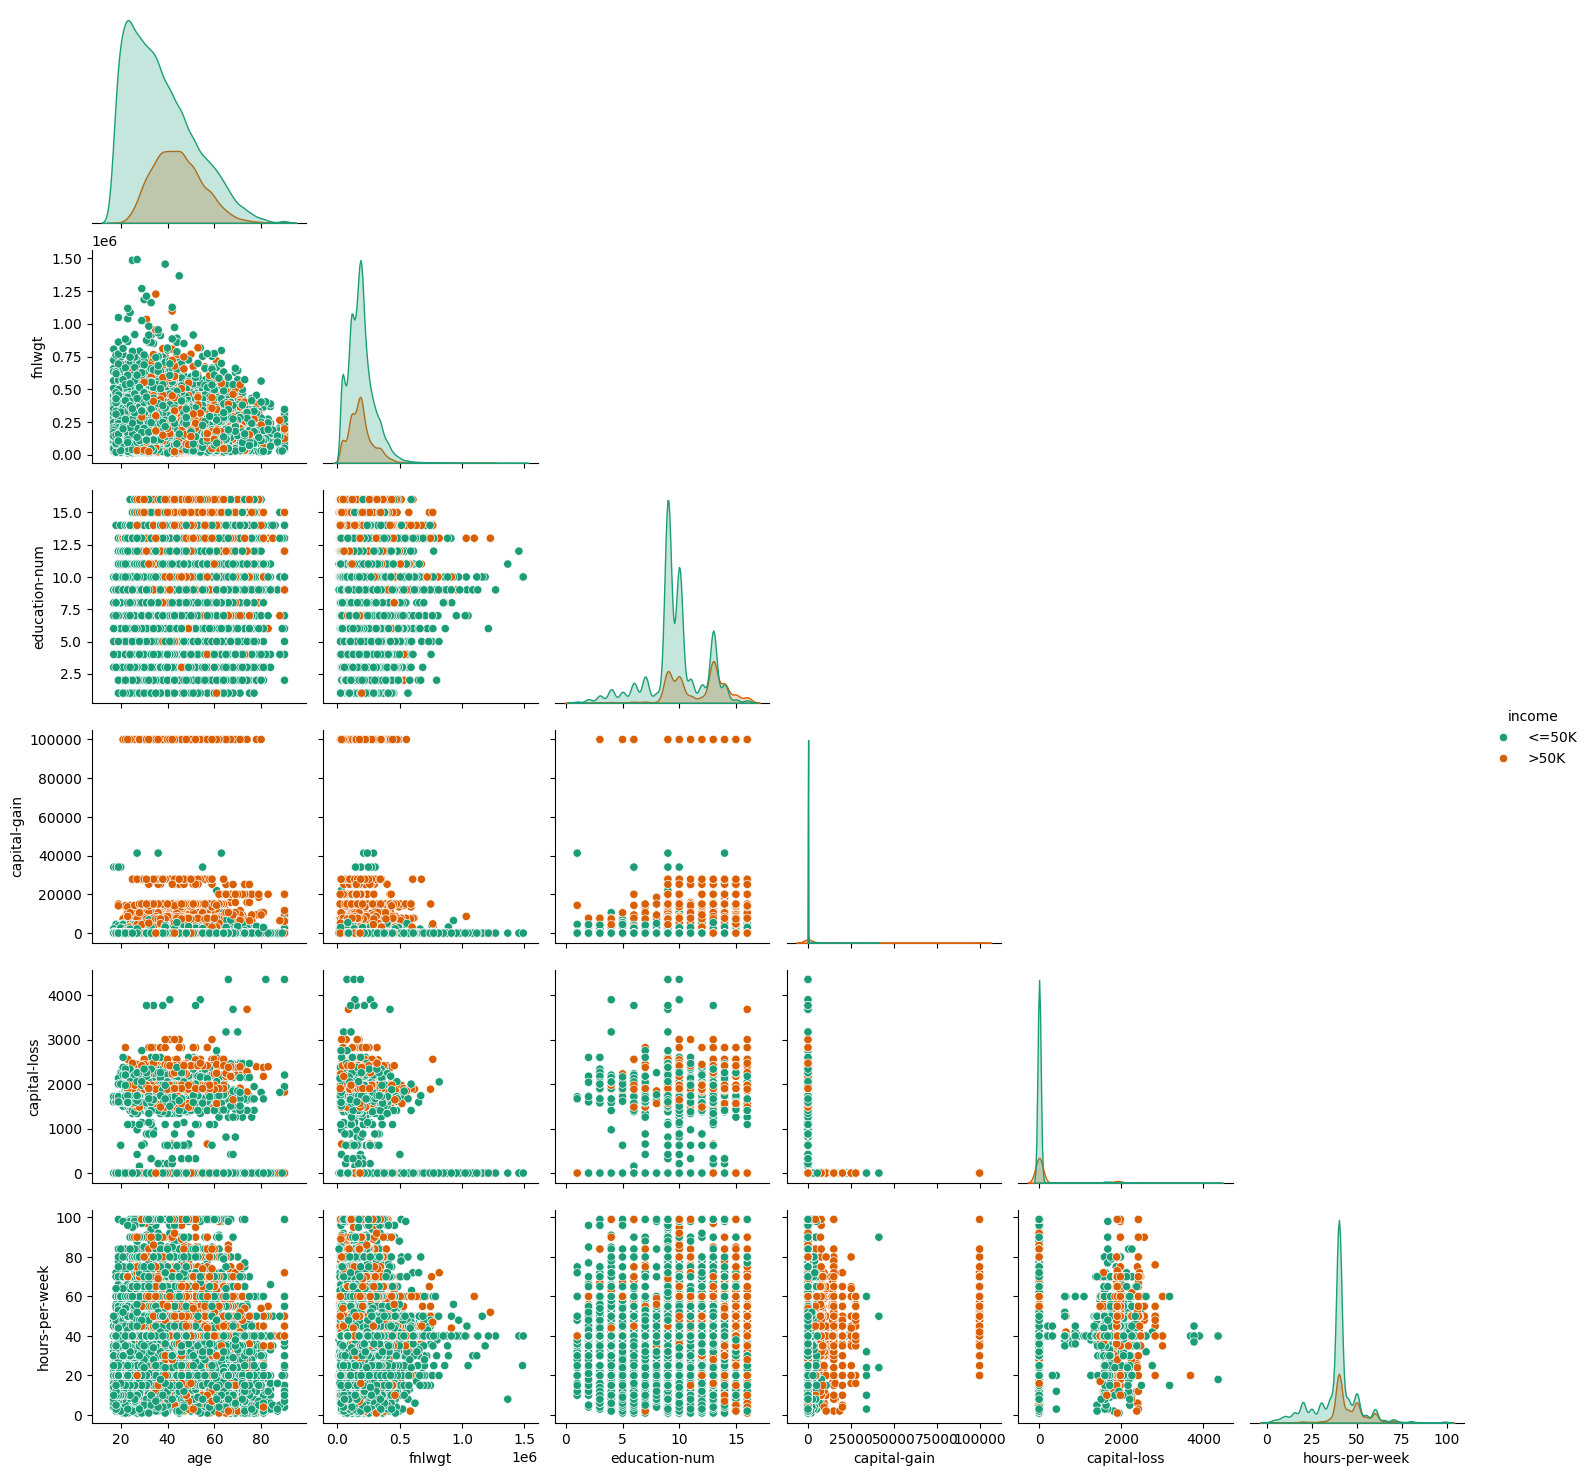

In [30]:
sns.set_palette(sns.color_palette("Dark2", 8))
sns.pairplot(data=census_df,hue='income',corner=True)
plt.show()

Age - Age column has a slight positive correlation with 'hours-per-week', suggesting older peopl might be working more hours.
Education Num - People with high education levels might work more hours. It also shows a slight positive correlation with 'Age' indicating age might increase with higher education levels.
Capital Gain & Loss - Most of the values centered around 0 , indicating most dont report any.


**Data Visualization**

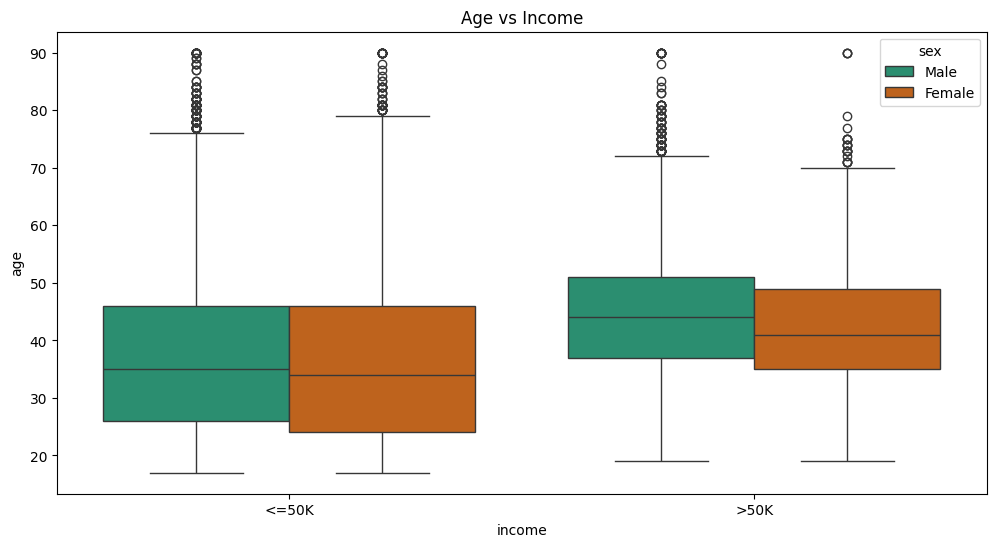

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='age', data=census_df,hue = 'sex')
plt.title('Age vs Income')
plt.show()

Median age of people  earning '>50k' is higher that those with income '<50k'..And Age distribution of people with income >50k is broader, indicating wide range of ages in this category. Both have outliers at the higher age end.

<Figure size 1400x600 with 0 Axes>

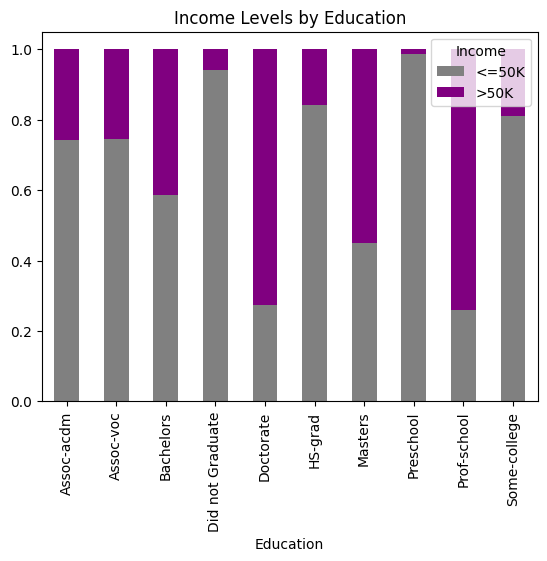

In [32]:
edu_income = census_df.groupby('education')['income'].value_counts(normalize=True).unstack()
plt.figure(figsize=(14, 6))
edu_income.plot(kind='bar', stacked=True, color=['grey', 'purple'])
plt.title('Income Levels by Education')
plt.xlabel('Education')
plt.legend(title='Income')
plt.show()

HIgher income levels are associated with higher income category. The trend seems to go up starting from Bachelors and upwards.

Median age of people  earning '>50k' is higher that those with income '<50k'..And Age distribution of people with income >50k is broader, indicating wide range of ages in this category. Both have outliers at the higher age end.

<Figure size 1400x600 with 0 Axes>

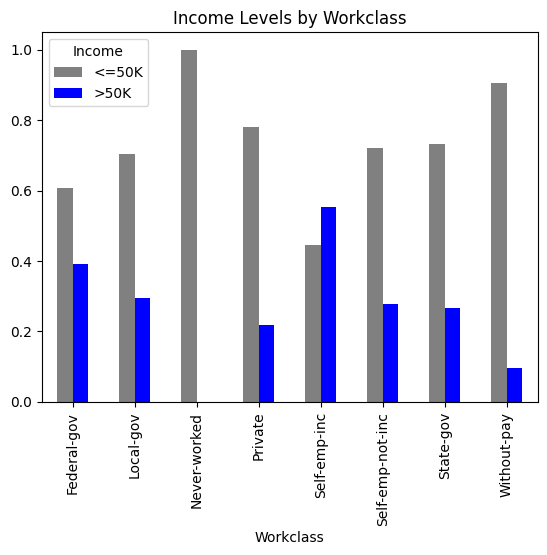

In [33]:
workclass_income = census_df.groupby('workclass')['income'].value_counts(normalize=True).unstack()
plt.figure(figsize=(14, 6))
workclass_income.plot(kind='bar',color=['grey', 'blue'])
plt.title('Income Levels by Workclass')
plt.xlabel('Workclass')
plt.legend(title='Income')
plt.show()

In [34]:
# hypothesis tesing - ttest to see if there is a  statistically significant difference in the average capital gain between individuals
# earning more than $50K/year and those earning less than $50K/year.
cg_above_50k = census_df[census_df['income'] == '>50K']['capital-gain']
cg_below_50k = census_df[census_df['income'] == '<=50K']['capital-gain']
t_stat, p_value= stats.ttest_ind(cg_above_50k, cg_below_50k, equal_var=False)
t_stat, p_value

(28.517503554125895, 5.330934217289156e-173)

In [35]:
# hypothesis tesing - ttest to see if there is a  statistically significant difference in the average capital loss between individuals
# earning more than $50K/year and those earning less than $50K/year.
cl_above_50k = census_df[census_df['income'] == '>50K']['capital-loss']
cl_below_50k = census_df[census_df['income'] == '<=50K']['capital-loss']
t_stat, p_value= stats.ttest_ind(cl_above_50k, cl_below_50k, equal_var=False)
t_stat, p_value

(24.347783717272726, 3.056872484488816e-128)

From these results, we can see that the p-value for both capital gain and loss is very less, statistically insignificant. So, we can reject the null hypothesis.

In [36]:
#Encoding categorical columns
from sklearn.preprocessing import LabelEncoder
# Select columns for label encoding
columns_to_encode = ['occupation', 'workclass', 'native-country']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for col in columns_to_encode:
    census_df[col] = census_df[col].fillna('Missing')
    census_df[col] = label_encoder.fit_transform(census_df[col])

<ipython-input-36-769f5df89235>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_df[col] = census_df[col].fillna('Missing')
<ipython-input-36-769f5df89235>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_df[col] = label_encoder.fit_transform(census_df[col])
<ipython-input-36-769f5df89235>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [37]:
from sklearn.impute import KNNImputer
# Select columns for KNN imputation
columns_to_impute = ['occupation', 'workclass', 'native-country']


knn_imputer = KNNImputer(n_neighbors=4)
# Apply KNN imputation to selected columns
census_df_imputed = knn_imputer.fit_transform(census_df[columns_to_impute])

# Replace the original columns with the imputed values
for i, col in enumerate(columns_to_impute):
    census_df[col] = census_df_imputed[:, i]

<ipython-input-37-11768bb65368>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_df[col] = census_df_imputed[:, i]


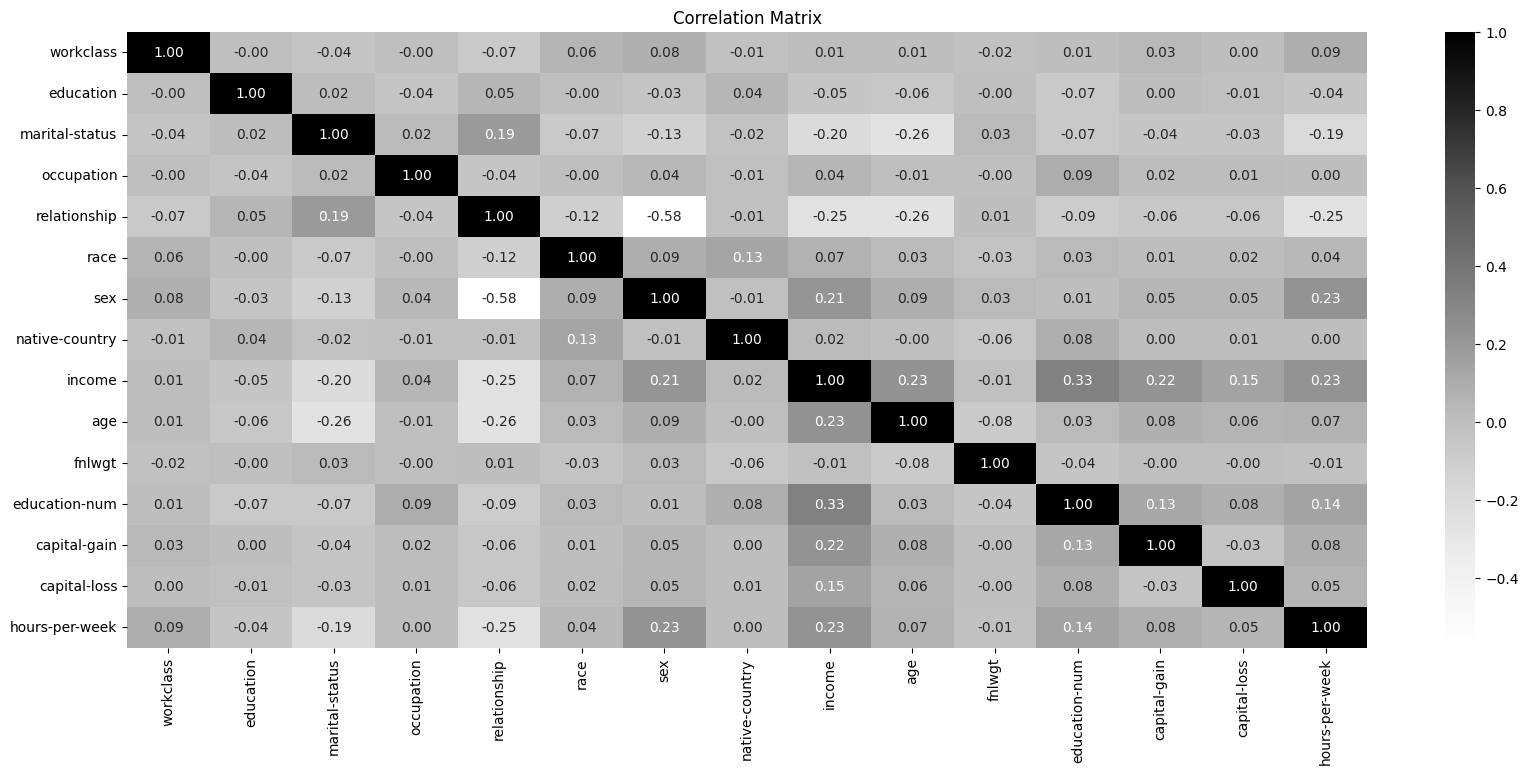

In [38]:

from sklearn.preprocessing import LabelEncoder

enc_data = census_df[cat_col].apply(LabelEncoder().fit_transform)
num_data = census_df.drop(columns=cat_col)

combined_data = pd.concat([enc_data, num_data], axis=1)

corr_matrix = combined_data.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Greys')
plt.title('Correlation Matrix', size=12)
plt.show()


In [39]:
# Drop column 'Education NUm'
if 'education-num' in census_df.columns:
    census_df.drop(columns=['education-num'], inplace=True)
num_col = census_df.select_dtypes(exclude=['object']).columns.tolist()

<ipython-input-39-91f771b08028>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_df.drop(columns=['education-num'], inplace=True)


Outlier Detection

In [40]:

def outliers_IQR(df,feature):
    q1=df[feature].quantile(0.25)
    q3=df[feature].quantile(0.75)
    IQR=q3-q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    print(f"lower_bound: {lower_bound}")
    print(f"upper_bound: {upper_bound}")
    outliers = df[(df[feature]<lower_bound) | (df[feature]>upper_bound)]
    return outliers

outliers_age = outliers_IQR(census_df,'age')

outliers_age_rows = outliers_age.shape[0]
outliers_age_rows



lower_bound: -2.0
upper_bound: 78.0


215

In [41]:
outliers_hours = outliers_IQR(census_df,'hours-per-week')

outliers_hours_rows = outliers_hours.shape[0]
outliers_hours_rows

lower_bound: 32.5
upper_bound: 52.5


13489

In [42]:
outliers_cg = outliers_IQR(census_df,'capital-gain')

outliers_cg_rows = outliers_cg.shape[0]
outliers_cg_rows

lower_bound: 0.0
upper_bound: 0.0


4035

In [43]:
outliers_cl = outliers_IQR(census_df,'capital-loss')

outliers_cl_rows = outliers_cl.shape[0]
outliers_cl_rows

lower_bound: 0.0
upper_bound: 0.0


2282

In [44]:
outliers_fnlwgt = outliers_IQR(census_df,'fnlwgt')

outliers_fnlwgt_rows = outliers_fnlwgt.shape[0]
outliers_fnlwgt_rows

lower_bound: -62542.5
upper_bound: 417717.5


1453

In [45]:
check_skew = census_df[['age', 'hours-per-week', 'fnlwgt', 'capital-loss', 'capital-gain']].skew().sort_values()
check_skew


hours-per-week     0.239643
age                0.556775
fnlwgt             1.439534
capital-loss       4.568263
capital-gain      11.891093
dtype: float64

In [46]:
# applying log transformation on columns 'Capital-Gain' and 'Capital-Loss' to reduce skewness
census_df = census_df.copy()
census_df['capital-gain-log']=np.log(census_df['capital-gain']+1)
census_df['capital-loss-log'] = np.log(census_df['capital-loss']+1)

#from scipy.stats import boxcox
#census_df['education-num-data'],fitted_lambda=boxcox(census_df['education-num'])
check_skewness = census_df[['capital-gain-log','capital-loss-log']].skew().sort_values()
check_skewness

capital-gain-log    3.112437
capital-loss-log    4.301482
dtype: float64

In [47]:
 census_df = census_df.drop(columns=['capital-gain', 'capital-loss'])

In [48]:
census_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'income', 'capital-gain-log', 'capital-loss-log'],
      dtype='object')

Encoding categorical variables using One-Hot Encoder


In [49]:
from sklearn.preprocessing import OneHotEncoder


X = census_df.drop('income', axis=1)
y = census_df['income']


cat_features = X.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[cat_features])

In [50]:
#transform encodeed features to dataframe
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(cat_features))


In [51]:
# dropping original categorical columns and concatenate the encoded columns
X_new = X.drop(cat_features, axis=1).reset_index(drop=True)
X_new = pd.concat([X_new, X_encoded_df], axis=1)

In [52]:
# encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(census_df['income'])

In [53]:
# scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_new.columns)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_encoded, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8357062378367305
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7375
           1       0.71      0.56      0.63      2388

    accuracy                           0.84      9763
   macro avg       0.79      0.74      0.76      9763
weighted avg       0.83      0.84      0.83      9763



In [55]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)


y_pred = d_tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.808972651848817
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7375
           1       0.61      0.63      0.62      2388

    accuracy                           0.81      9763
   macro avg       0.74      0.75      0.74      9763
weighted avg       0.81      0.81      0.81      9763



In [56]:

from sklearn.neighbors import KNeighborsClassifier

knn =  KNeighborsClassifier()
knn.fit(X_train,y_train)


y_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.8244392092594489
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7375
           1       0.65      0.60      0.62      2388

    accuracy                           0.82      9763
   macro avg       0.76      0.75      0.76      9763
weighted avg       0.82      0.82      0.82      9763



In [57]:
from sklearn.svm import SVC

svm =  SVC(random_state=1)
svm.fit(X_train,y_train)


y_pred = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.8416470347229336
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7375
           1       0.74      0.55      0.63      2388

    accuracy                           0.84      9763
   macro avg       0.80      0.74      0.76      9763
weighted avg       0.83      0.84      0.83      9763



In [58]:

from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)


y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8503533749871965
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7375
           1       0.73      0.61      0.67      2388

    accuracy                           0.85      9763
   macro avg       0.81      0.77      0.79      9763
weighted avg       0.84      0.85      0.85      9763



In [59]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


XGBoost Accuracy: 0.8684830482433679
              precision    recall  f1-score   support

           0       0.90      0.94      0.91      7375
           1       0.77      0.66      0.71      2388

    accuracy                           0.87      9763
   macro avg       0.83      0.80      0.81      9763
weighted avg       0.86      0.87      0.87      9763



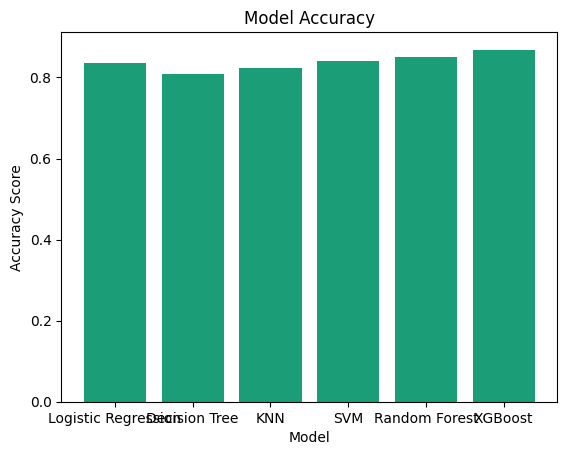

In [60]:

from sklearn.metrics import roc_curve, auc

accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, log_reg.predict(X_test)),
    "Decision Tree": accuracy_score(y_test, d_tree.predict(X_test)),
    "KNN": accuracy_score(y_test, knn.predict(X_test)),
    "SVM": accuracy_score(y_test, svm.predict(X_test)),
    "Random Forest": accuracy_score(y_test, rf.predict(X_test)),
    "XGBoost": accuracy_score(y_test, xgb.predict(X_test))
}


plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy')
plt.show()


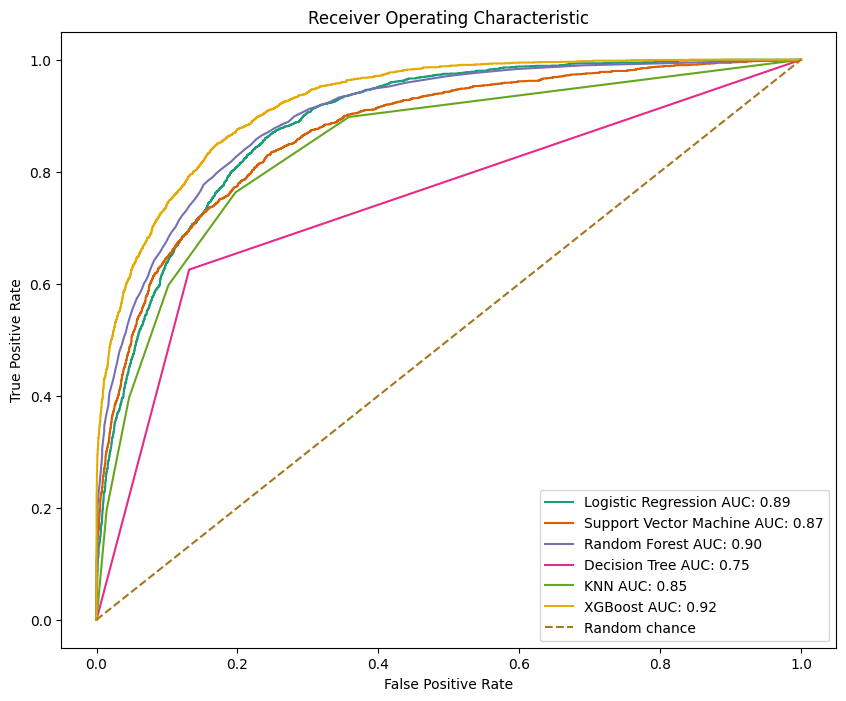

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
#prediction probabilities for the positive class for each model
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
svm_scores = svm.decision_function(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]
d_tree_probs = d_tree.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
xgb_probs = xgb.predict_proba(X_test)[:, 1]
#calculating ROC scores for each model
log_reg_auc = roc_auc_score(y_test, log_reg_probs)
svm_auc = roc_auc_score(y_test, svm_scores)
rf_auc = roc_auc_score(y_test, rf_probs)
d_tree_auc = roc_auc_score(y_test, d_tree_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
# Calculating ROC curves
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_scores)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
d_tree_fpr, d_tree_tpr, _ = roc_curve(y_test, d_tree_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
# Plotting the ROC curve for each model
plt.figure(figsize=(10, 8))
plt.plot(log_reg_fpr, log_reg_tpr, label='Logistic Regression AUC: {:.2f}'.format(log_reg_auc))
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine AUC: {:.2f}'.format(svm_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest AUC: {:.2f}'.format(rf_auc))
plt.plot(d_tree_fpr, d_tree_tpr, label='Decision Tree AUC: {:.2f}'.format(d_tree_auc))
plt.plot(knn_fpr, knn_tpr, label='KNN AUC: {:.2f}'.format(knn_auc))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost AUC: {:.2f}'.format(xgb_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random chance')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [64]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef, f1_score

estimator_list = [
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42)),
    ('d_tree', DecisionTreeClassifier(random_state=1)),
    ('knn', KNeighborsClassifier()),
    ('svm', SVC(random_state=1)),
    ('rf', RandomForestClassifier(random_state=1)),
    ('xgb',XGBClassifier(random_state=1))
]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(random_state=42)
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred)
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred)
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred)
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred)
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)


Model performance for Training set
- Accuracy: 0.9172343149807939
- MCC: 0.7642663437668591
- F1 score: 0.9151898699495377
----------------------------------
Model performance for Test set
- Accuracy: 0.8671514903205981
- MCC: 0.6264179278613131
- F1 score: 0.8638732670336642
